In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)
data(hflights, package='hflights')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'reshape2' was built under R version 3.4.4"

In [2]:
str(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

In [3]:
flights.1 <- hflights %>% 
group_by(Origin, Dest) %>%
summarise(avg_delay = round(mean(DepDelay , na.rm = T), digit=3), 
          avg_ArrDelay = round(mean(ArrDelay, na.rm = T), digits=3))

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

In [4]:
head(flights.1)

Origin,Dest,avg_delay,avg_ArrDelay
HOU,ABQ,11.582,6.001
HOU,ATL,9.129,6.810
HOU,AUS,12.189,9.274
HOU,BHM,15.015,6.673
HOU,BKG,-3.202,-16.234
HOU,BNA,11.395,5.394


In [5]:
flights.melt <- melt(flights.1, id=c("Origin"), 
                     measure=c("avg_delay","avg_ArrDelay"),
                     variable.name = "Delay_type",
                     value.name = "Delay_time",
                     na.rm = T)

In [6]:
tail(flights.1, 6)

Origin,Dest,avg_delay,avg_ArrDelay
IAH,TPA,6.611,3.752
IAH,TUL,5.738,5.482
IAH,TUS,7.784,7.802
IAH,TYS,10.171,11.366
IAH,VPS,12.339,12.457
IAH,XNA,6.691,6.896


In [7]:
tail(flights.melt)

,Origin,Delay_type,Delay_time
293,IAH,avg_ArrDelay,3.752
294,IAH,avg_ArrDelay,5.482
295,IAH,avg_ArrDelay,7.802
296,IAH,avg_ArrDelay,11.366
297,IAH,avg_ArrDelay,12.457
298,IAH,avg_ArrDelay,6.896


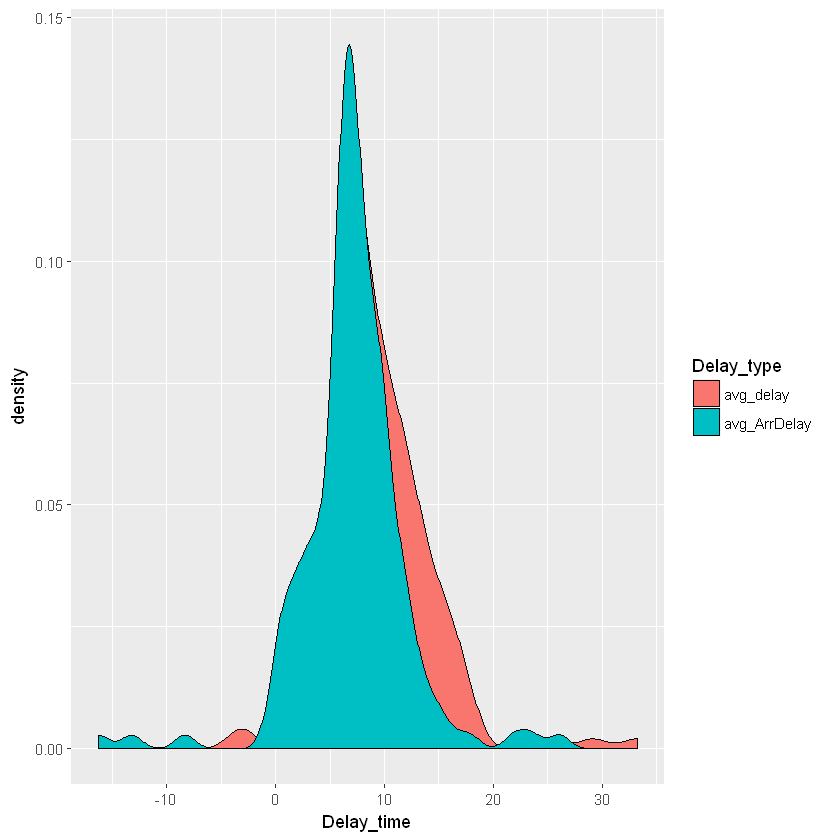

In [8]:
ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type)) + geom_density()

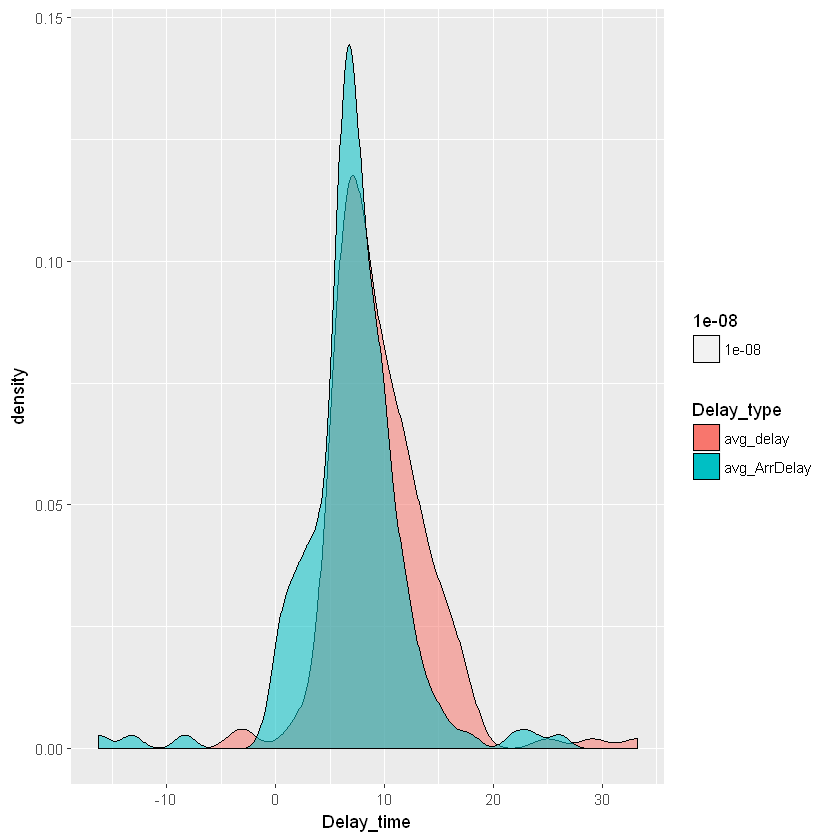

In [9]:
ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type, alpha = 0.00000001)) + 
geom_density()

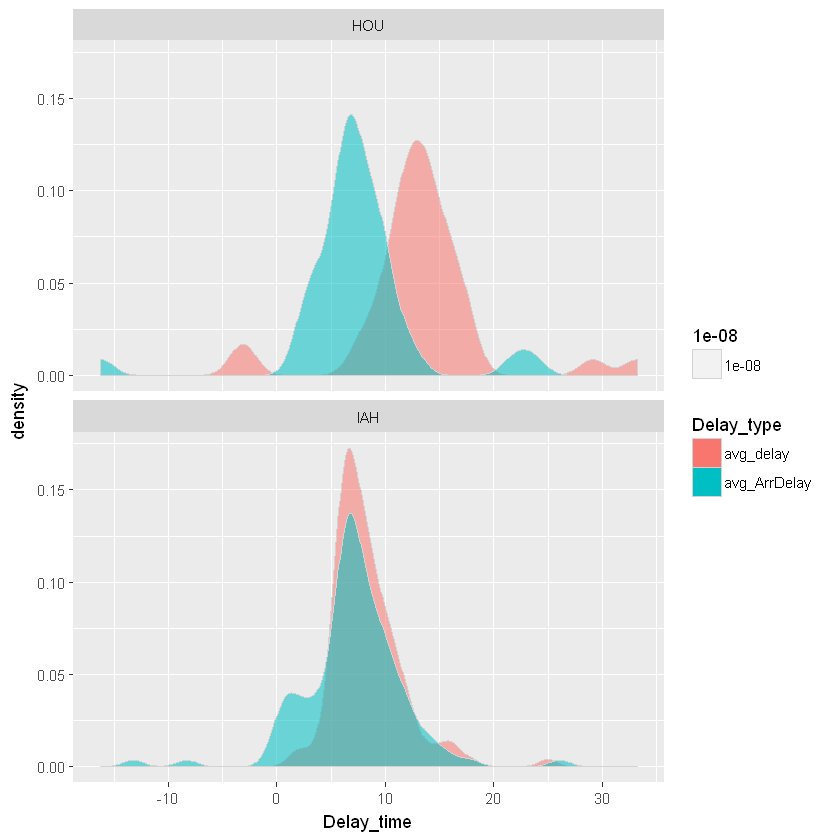

In [10]:
ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type, alpha = 0.00000001)) + 
geom_density(colour = "lightgray", size = 0.00000001) +
facet_wrap(~Origin, nrow = 2)

Step 1 : 목적지 공항(Dest)에 대해 연착 건수를 구하고, 연착 건수가 2000회 이상인 공항에 대한 데이터만 따로 추출하시오. (연착 건수는 도착 지연시간(DepDelay) 5분 이상인 것으로 할 것)

In [21]:
head(hflights$DepDelay, 20)
head(hflights$DepDelay > 5, 20)
sum(hflights$DepDelay > 5, na.rm = T)

[1]  0  1 -8  3  5 -1 -1 -5 43 43 29 19 -2 -3 -1 -1 90  8 -4 67

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[13] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE

[1] 71417

In [18]:
length(hflights$DepDelay)
length(hflights$DepDelay > 5)

[1] 227496

[1] 227496

In [26]:
flights.2 <- hflights %>% 
group_by(Dest) %>%
summarise( num_DepDelay = sum(DepDelay > 5, na.rm = T))

In [32]:
flights.2 <- flights.2[flights.2$num_DepDelay >= 2000,]

위의 결과를 바탕으로 목적지 공항, 월별 결항 횟수, 회항 횟수, 운항 횟수를 구하시요
* 운항 횟수는 결항과 회황을 제외할 것

In [34]:
head(flights.2)

Dest,num_DepDelay
ATL,2088
DAL,3458
DEN,2183
LAX,2727
MSY,2145
ORD,2158


In [33]:
head(hflights$Dest == flights.2$Dest)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [35]:
head(hflights[hflights$Dest == flights.2$Dest,])

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
74665,2011,1,31,1,1522,1632,CO,33,N16647,70,...,-2,-3,IAH,MSY,305,7,21,0,,0
74683,2011,1,31,1,1803,1927,CO,59,N57870,144,...,15,28,IAH,DEN,862,12,16,0,,0
74866,2011,1,31,1,1924,2026,CO,423,N33266,62,...,-8,-1,IAH,MSY,305,2,19,0,,0
74966,2011,1,31,1,1313,1516,CO,601,N26208,183,...,36,9,IAH,DEN,862,18,34,0,,0
75033,2011,1,31,1,1423,1652,CO,746,N78524,149,...,-8,3,IAH,ORD,925,11,24,0,,0
75054,2011,1,31,1,1550,1736,CO,795,N76502,226,...,8,10,IAH,LAX,1379,13,15,0,,0


In [36]:
flights.4 <- hflights[hflights$Dest == flights.2$Dest,]

In [37]:
dim(flights.4)

[1] 7038   21

목적지 공항(Dest), 월별(Month) 결항 횟수(Cancelled), 회항 횟수(Diverted), 운항 횟수

In [44]:
head(flights.4$Dest)
head(flights.4$Cancelled)
head(flights.4$Diverted)

[1] "MSY" "DEN" "MSY" "DEN" "ORD" "LAX"

[1] 0 0 0 0 0 0

[1] 0 0 0 0 0 0

In [58]:
str(flights.4)

'data.frame':	7038 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  31 31 31 31 31 31 31 31 31 30 ...
 $ DayOfWeek        : int  1 1 1 1 1 1 1 1 1 7 ...
 $ DepTime          : int  1522 1803 1924 1313 1423 1550 2101 753 1027 1441 ...
 $ ArrTime          : int  1632 1927 2026 1516 1652 1736 2215 1032 1136 1610 ...
 $ UniqueCarrier    : chr  "CO" "CO" "CO" "CO" ...
 $ FlightNum        : int  33 59 423 601 746 795 1423 1746 1823 137 ...
 $ TailNum          : chr  "N16647" "N57870" "N33266" "N26208" ...
 $ ActualElapsedTime: int  70 144 62 183 149 226 74 159 69 209 ...
 $ AirTime          : int  42 116 41 131 114 198 42 117 42 185 ...
 $ ArrDelay         : int  -2 15 -8 36 -8 8 4 32 -3 -5 ...
 $ DepDelay         : int  -3 28 -1 9 3 10 -4 28 -3 13 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "MSY" "DEN" "MSY" "DEN" ...
 

In [61]:
dim(flights.4)

[1] 7038   21

In [63]:
length(flights.4$Cancelled > 1)

[1] 7038

In [66]:
length(flights.4$Cancelled)

[1] 7038

In [73]:
unique(hflights$Diverted)

[1] 0 1

In [83]:
dim(hflights)[1]

[1] 227496

In [84]:
length(hflights$Year)

[1] 227496

In [82]:
sum(hflights$Diverted)

[1] 649

In [78]:
sum(hflights$Diverted == 1)

[1] 649

In [75]:
sum(hflights$Diverted)

[1] 649

In [72]:
mode(hflights$Diverted)

[1] "numeric"

In [45]:
flights.5 <- flights.4 %>% 
group_by(Dest, Month) %>%
summarise(
    num_Cancelled = sum(Cancelled),
    num_Diverted = sum(Diverted),
    num_Air = length(Dest) - sum(Cancelled) - sum(Diverted)
)

In [46]:
str(flights.5)

Classes 'grouped_df', 'tbl_df', 'tbl' and 'data.frame':	72 obs. of  5 variables:
 $ Dest         : chr  "ATL" "ATL" "ATL" "ATL" ...
 $ Month        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ num_Cancelled: int  5 2 5 6 3 1 2 1 1 1 ...
 $ num_Diverted : int  0 0 0 2 0 2 0 1 0 0 ...
 $ num_Air      : int  96 90 121 121 129 112 102 106 101 102 ...
 - attr(*, "vars")= chr "Dest"
 - attr(*, "drop")= logi TRUE


In [51]:
melt.hflights.5 <- melt(flights.5, c("Dest","Month"), 
                        c("num_Cancelled","num_Diverted","num_Air"), na.rm=T)

In [53]:
?melt